starting with our imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

adding the data:

In [2]:
sales = pd.read_csv('sales.csv')
weather = pd.read_csv('weather.csv')
keys = pd.read_csv('key.csv')

we start by making our graphs: (Section A)
an in-depth explanation can be found in the attached presentation.

C:\Users\Ameer\AppData\Local\Temp/ipykernel_5212/3928323307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales11['monthyear'] = sales11['date'].apply(getMonthYear)


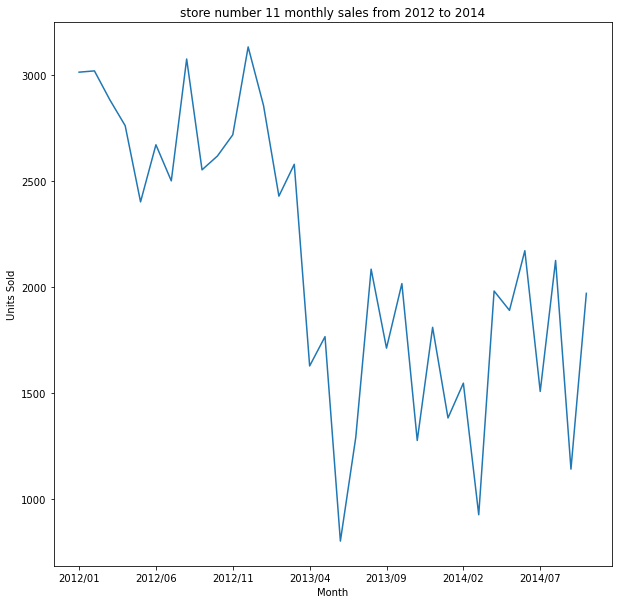

In [3]:
sales11=sales.loc[sales.store_nbr==11]
def getMonthYear(date):
    index=date.find('-')
    return date[:4]+'/'+date[5:7]
sales11['monthyear'] = sales11['date'].apply(getMonthYear)
sales11=sales11.groupby("monthyear", sort=True)["units"].sum()

plt.figure(figsize=(10,10))
sales11.plot.line()
plt.title('store number 11 monthly sales from 2012 to 2014')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.show()

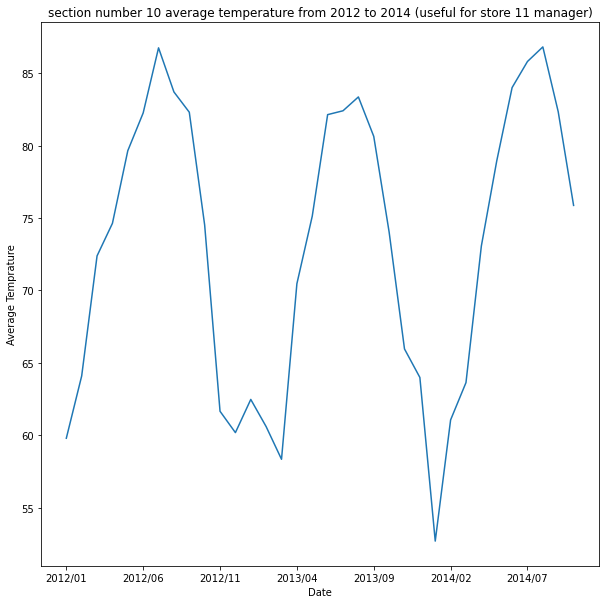

In [4]:
weather10=weather.loc[weather.station_nbr==10]
weather10=weather10[['date','tavg']]
weather10=weather10[weather10.tavg.apply(lambda x: x.isnumeric())]
weather10['tavg']=weather10[['tavg']].astype(int)
weather10['monthyear'] = weather10['date'].apply(getMonthYear)
weather10=weather10.groupby("monthyear", sort=True)["tavg"].mean()

plt.figure(figsize=(10,10))
weather10.plot.line()
plt.title('section number 10 average temperature from 2012 to 2014 (useful for store 11 manager)')
plt.xlabel('Date')
plt.ylabel('Average Temprature')
plt.show()

Text(0.5, 1.0, 'Sales for Every walmart store')

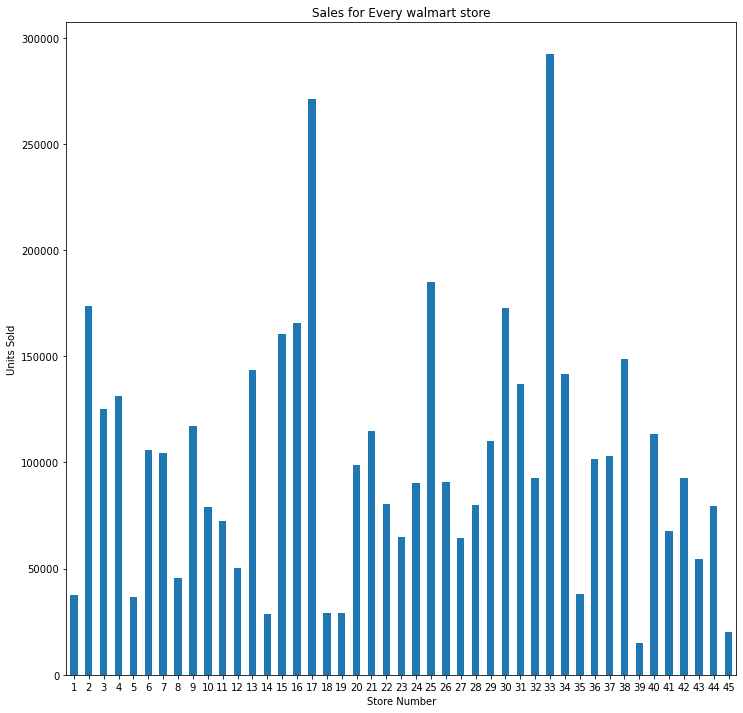

In [5]:
sales1=sales.groupby("store_nbr", sort=True)["units"].sum()
sales1.plot.bar(figsize=(12,12))
sales1.plot.bar(x='store_nbr', y='', rot=0)
plt.ylabel('Units Sold')
plt.xlabel('Store Number')
plt.title('Sales for Every walmart store')


Text(0, 0.5, 'Units Sold')

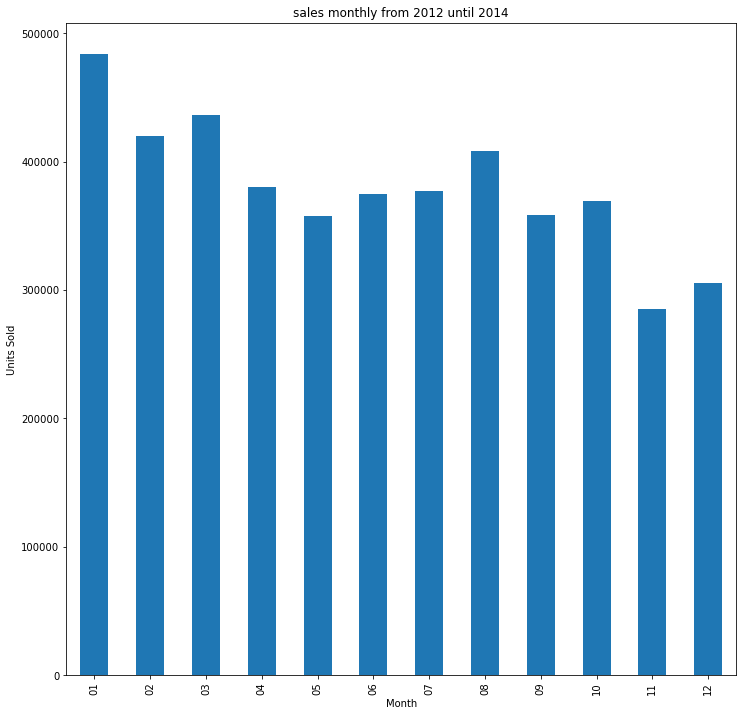

In [6]:
sales2 = sales.copy(deep = True)
def getMonth(date):#We got this function from moodle
    index=date.find('-')
    return date[5:7]
sales2['month'] = sales2['date'].apply(getMonth)
sales2 = sales.copy(deep = True)
sales2['month'] = sales2['date'].apply(getMonth)
sales2=sales2.groupby("month", sort=True)["units"].sum()
sales2.plot.bar(figsize=(12,12))
sales2.plot.bar(x='month', y='sales')
plt.title('sales monthly from 2012 until 2014')
plt.xlabel('Month')
plt.ylabel('Units Sold')

Section B: pre-processing the data:

here we made some data manipulations on date so we can access the month easier. (helped us later on in the preporcessing).

In [7]:
weather = pd.read_csv('weather.csv')
import numpy as np
def add_month_stationnbr(date,station_nbr):
    return str(station_nbr)+date[:7]
weather['date_st']=weather.apply(lambda x: add_month_stationnbr(x['date'],x['station_nbr']), axis=1)

np_sorted_date=weather.to_numpy()
np_sorted_date_st=np_sorted_date[np_sorted_date[:, -1].argsort()]
date_st_sorted=np_sorted_date_st[:,-1]
date_sorted=np_sorted_date[:,1]
date_sorted
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

means=[]

for j in range(2,np_sorted_date.shape[1]-1) :
    w=[]
    for i in range(0,np_sorted_date.shape[0]) :
        if(hasNumbers(np_sorted_date[i][j])):
            w.append(np_sorted_date[i][j])
    w=np.array(w)
    w=w.astype(np.float64)
    means.append(w.mean())
print('averages for every column:')
means

C:\Users\Ameer\AppData\Local\Temp/ipykernel_5212/3971030238.py:24: RuntimeWarning: Mean of empty slice.
  means.append(w.mean())
C:\Users\Ameer\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


averages for every column:


[71.62113099790933,
 50.654546381763474,
 61.24013019739605,
 1.36309127248501,
 47.270918341645256,
 53.88824292758889,
 9.704535909281814,
 5.944666106677866,
 585.038578399779,
 1823.3870730135347,
 nan,
 0.044908334617162225,
 0.11470052762799328,
 29.16276955278742,
 30.00915979354015,
 6.468325973504617,
 18.72992773986351,
 7.914076977904491]

we started with the data amputation process: 
we decided to calculate the average (statistical estimate) of the month for the specific section to replace the missing values. if the whole month is missing values we look at the data from other sections (take the mean of the month) and if that's also missing we take the average of the whole year. 

then we checked how much data does each column has that would help us later on with the heatmap and deciding which columns to drop.

In [8]:
def imputation(x,date,station_nbr,col,count):
    if(x!='M' and x!='-'and x!='T' and x!='  T'):
        if type(x) == int or type(x) == float:
            return float(x)
        elif(hasNumbers(x)):
            return float(x)
        else: return x
    elif(x=='T' or x=='  T'):
        return 0.005
    else:
        dict_missing_counts[col]+=1
        w=[]
        min=np.searchsorted(date_st_sorted, str(station_nbr)+date[:7], side ='left')
        max=np.searchsorted(date_st_sorted, str(station_nbr)+date[:7], side ='right')
        for i in range(min,max):
            if(hasNumbers(np_sorted_date_st[i][count])):
                w.append(np_sorted_date_st[i][count])
        if(len(w)==0):
            min=np.searchsorted(date_sorted, date, side ='left')
            max=np.searchsorted(date_sorted, date, side ='right')
            for i in range(min,max):
                if(hasNumbers(np_sorted_date[i][count])):
                    w.append(np_sorted_date[i][count])
        if(len(w)==0):
            return means[count-2]
        w=np.array(w)
        w=w.astype(np.float64)
        res=w.mean()
        return res
lists = weather.columns.to_list()
lists=lists[2:-1]
i=2
dict_missing_counts={}
for col in lists :
    dict_missing_counts[col]=0
    weather[col]=weather.apply(lambda x: imputation(x[col],x['date'],x['station_nbr'],col,i), axis=1)
    print('column number '+str(i)+' done')
    i+=1
print('total missing data for every column')
dict_missing_counts


column number 2 done
column number 3 done
column number 4 done
column number 5 done
column number 6 done
column number 7 done
column number 8 done
column number 9 done
column number 10 done
column number 11 done
column number 12 done
column number 13 done
column number 14 done
column number 15 done
column number 16 done
column number 17 done
column number 18 done
column number 19 done
total missing data for every column


{'tmax': 906,
 'tmin': 908,
 'tavg': 1469,
 'depart': 11511,
 'dewpoint': 666,
 'wetbulb': 1252,
 'heat': 1469,
 'cool': 1469,
 'sunrise': 9656,
 'sunset': 9656,
 'codesum': 0,
 'snowfall': 7224,
 'preciptotal': 860,
 'stnpressure': 929,
 'sealevel': 1724,
 'resultspeed': 589,
 'resultdir': 589,
 'avgspeed': 875}

creating the heat map:
we can see that there is a strong correlation between tmax, tmin, tavg, dewpoint, wetbulb. heat and cool. and resultspeed and avgspeed. so we looked at the values of each column from before, and decided to keep tavg, cool and avgspeed.

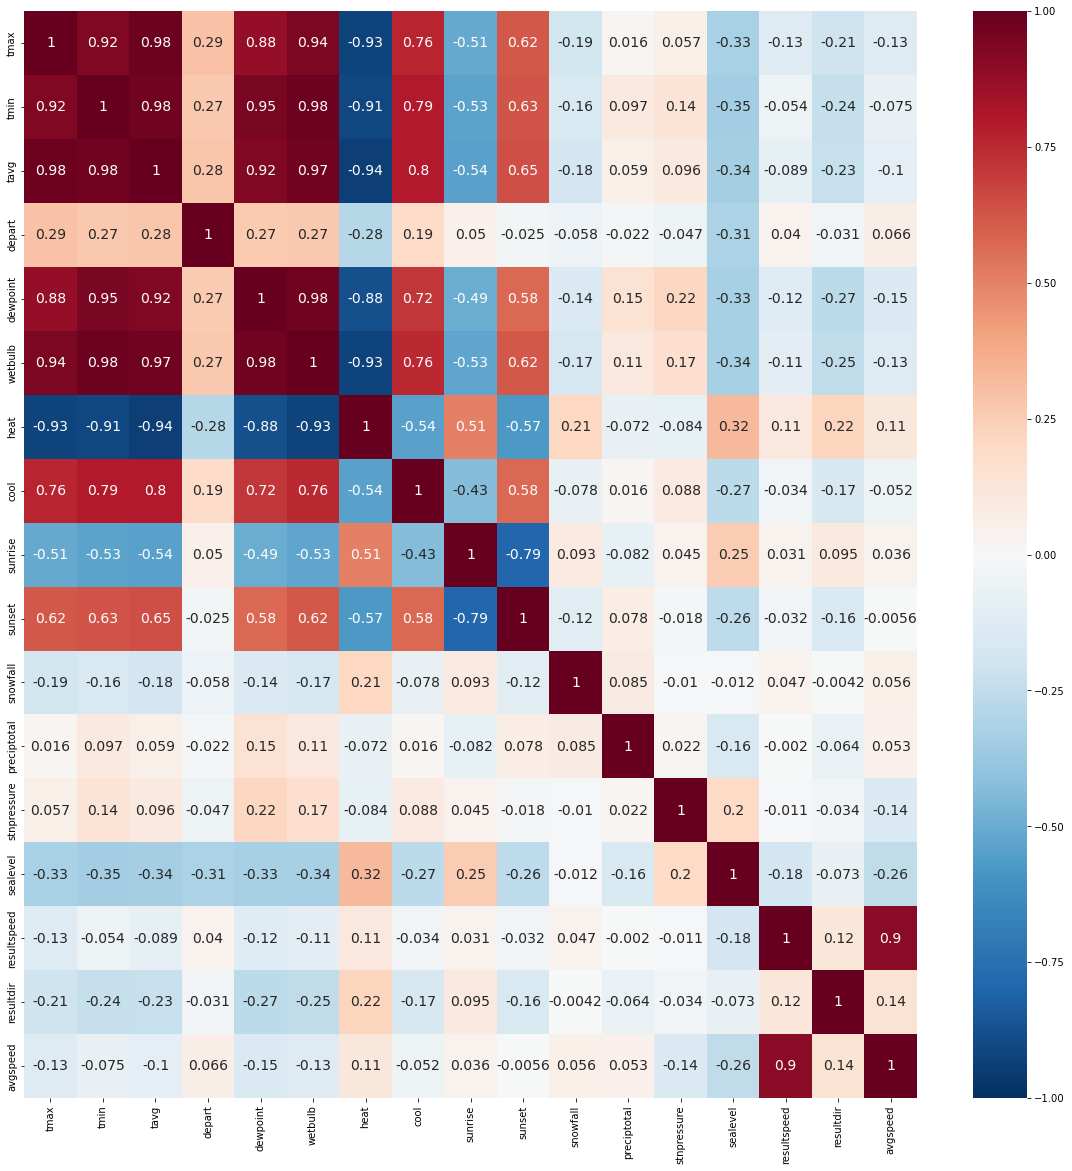

In [9]:
weather_corr=weather.copy()
weather_corr.drop('codesum', inplace=True, axis=1)
weather_corr=weather_corr.iloc[:,2:]
weather_corr=weather_corr.corr()
plt.figure(figsize = (20,20))
sns.heatmap(data=weather_corr, cmap= 'RdBu_r', vmin=-1, vmax=1, annot=True, annot_kws={"size":14})
plt.show()


as for the data transformation we went with one hot encoding:
we defined the 4 seasons of the year to be part of our dataset. that would give better indication about the weather.

In [11]:
def getSeason(date,season):
    if(date[5:]>='12-21' or date[5:] <='03-20'):
        if(season=='winter'):
            return 1
        else: return 0
    if(date[5:]>='03-21' and date[5:] <='06-19'):
        if(season=='spring'):
            return 1
        else: return 0
    if(date[5:]>='06-20' and date[5:] <='09-22'):
        if(season=='summer'):
            return 1
        else: return 0
    else:
        if(season=='fall'):
            return 1
        else: return 0
weather['winter']=weather.apply(lambda x: getSeason(x['date'],'winter'), axis=1)
weather['summer']=weather.apply(lambda x: getSeason(x['date'],'summer'), axis=1)
weather['fall']=weather.apply(lambda x: getSeason(x['date'],'fall'), axis=1)
weather['spring']=weather.apply(lambda x: getSeason(x['date'],'spring'), axis=1)

In [12]:
display(weather.sample(10))

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,stnpressure,sealevel,resultspeed,resultdir,avgspeed,date_st,winter,summer,fall,spring
5386,19,2012-10-03,67.0,54.0,61.0,4.000000,55.0,57.0,4.000000,0.000000,...,29.22,29.950000,2.0,36.0,4.5,192012-10,0,0,1,0
14040,4,2013-12-12,54.0,32.0,51.0,-1.517241,29.0,39.0,14.517241,0.517241,...,29.75,30.166667,1.1,2.0,2.6,42013-12,0,0,1,0
2472,3,2012-05-10,83.0,52.0,68.0,0.000000,50.0,58.0,0.000000,3.000000,...,29.19,29.910000,4.9,13.0,5.5,32012-05,0,0,0,1
6553,6,2012-12-01,84.0,66.0,75.0,22.000000,64.0,67.0,0.000000,10.000000,...,29.53,30.050000,11.2,19.0,10.9,62012-12,0,0,1,0
19335,19,2014-09-02,80.0,62.0,71.0,4.000000,59.0,64.0,0.000000,6.000000,...,29.15,29.880000,4.6,26.0,5.2,192014-09,0,1,0,0
12423,7,2013-09-22,81.0,55.0,68.0,-2.700000,46.0,56.0,0.000000,3.000000,...,28.50,29.870000,9.0,15.0,9.4,72013-09,0,1,0,0
1649,17,2012-03-27,83.0,59.0,71.0,7.111111,54.0,61.0,0.000000,6.000000,...,29.29,29.980000,8.3,19.0,8.6,172012-03,0,0,0,1
10567,20,2013-06-19,93.0,70.0,82.0,-0.777778,70.0,74.0,0.000000,17.000000,...,29.23,29.920000,5.6,13.0,6.4,202013-06,0,0,0,1
5550,3,2012-10-12,74.0,66.0,70.0,6.000000,65.0,66.0,0.000000,5.000000,...,29.36,30.080000,9.5,15.0,11.1,32012-10,0,0,1,0
7807,20,2013-02-01,60.0,32.0,46.0,-2.666667,27.0,38.0,19.000000,0.000000,...,29.53,30.280000,3.7,9.0,7.7,202013-02,1,0,0,0


and here we implemented one hot encoding on the codesumm column that has the codes for the type of weather in the specific day:

In [13]:
def getSign(codesum,code):
    if(not any(c.isalpha() for c in codesum)):
        if(code == 'MOD'):
            return 1
    if(code in codesum):
        return 1
    return 0
 
        
l = ['+FC','FC','GR','RA','DZ','SN','SG','GS','PL','IC','FG+','FG','BR','UP','HZ','FU','VA','DU','DS','PO','SA','SS','PY','SQ'
      ,'DR','SH','FZ','MI','PR','BC','BL','VC','MOD']
for i in l:
    weather[i]=weather.apply(lambda x: getSign(x['codesum'],i), axis=1)
pd.set_option('display.max_columns', None)
weather.sample(10)



,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,date_st,winter,summer,fall,spring,+FC,FC,GR,RA,DZ,SN,SG,GS,PL,IC,FG+,FG,BR,UP,HZ,FU,VA,DU,DS,PO,SA,SS,PY,SQ,DR,SH,FZ,MI,PR,BC,BL,VC,MOD
5912,5,2012-10-30,69.052632,42.578947,55.944444,0.000000,37.176471,46.588235,9.055556,0.0,615.000000,1641.000000,,0.0,0.096316,29.03,29.913125,6.923529,21.529412,8.331579,52012-10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19368,12,2014-09-04,88.000000,73.000000,81.000000,5.444444,72.000000,75.000000,0.000000,16.0,568.636364,1838.090909,RA BR,0.0,0.030000,30.03,30.080000,2.900000,10.000000,3.700000,122014-09,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16883,7,2014-05-03,89.000000,48.000000,69.000000,0.375000,31.000000,51.000000,0.000000,4.0,503.636364,1887.636364,,0.0,0.000000,28.56,29.920000,13.800000,19.000000,14.500000,72014-05,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13338,2,2013-11-07,60.000000,36.000000,48.000000,5.000000,45.000000,47.000000,17.000000,0.0,628.000000,1634.000000,RA,0.0,0.130000,28.74,29.820000,12.400000,25.000000,15.000000,22013-11,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11483,20,2013-08-04,102.000000,80.000000,91.000000,0.111111,68.000000,75.000000,0.000000,26.0,514.000000,1918.700000,,0.0,0.000000,29.28,29.970000,4.300000,15.000000,6.100000,202013-08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
222,15,2012-01-12,32.000000,26.000000,29.000000,9.000000,26.000000,28.000000,36.000000,0.0,716.000000,1632.000000,SN FZFG BR UP,3.7,0.340000,29.44,29.780000,6.900000,4.000000,7.700000,152012-01,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12588,12,2013-09-30,81.000000,69.000000,75.000000,0.100000,64.000000,68.000000,0.000000,10.0,592.727273,1784.727273,,0.0,0.000000,29.96,30.010000,5.100000,6.000000,5.300000,122013-09,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16553,17,2014-04-16,68.000000,45.000000,57.000000,-10.444444,31.000000,45.000000,8.000000,0.0,546.181818,1851.363636,,0.0,0.000000,29.34,30.040000,12.500000,18.000000,12.700000,172014-04,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8942,15,2013-03-30,55.000000,26.000000,41.000000,3.000000,20.000000,33.000000,24.000000,0.0,532.000000,1810.000000,,0.0,0.000000,29.67,30.060000,3.600000,31.000000,4.400000,152013-03,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20404,8,2014-10-26,86.000000,57.000000,72.000000,7.000000,60.000000,64.000000,0.000000,7.0,630.363636,1709.363636,BR,0.0,0.000000,29.64,29.800526,4.700000,17.000000,4.800000,82014-10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


here we picked these columns for normalization according to the heatmap.

In [14]:
col_names_for_normlization=['date','units','tavg','depart','cool','sunrise','sunset','snowfall','preciptotal'
                            ,'stnpressure','sealevel','resultdir','avgspeed','winter','summer','fall','spring']
for i in l:
    col_names_for_normlization.append(i)

now we start with section C after we're done with the pre-processing.

we started by taking only sales from items number 5,6,9,16,45.
then we summed the items sales by date and store number.
and in the end we merged the datasets (keysum datafram on keys dataframe to and keys dataframe on weather).
final result was a dataset that includes everything.

In [ ]:
sales = sales.loc[(sales.item_nbr==5)|(sales.item_nbr==6)|(sales.item_nbr==9)|(sales.item_nbr==16)|(sales.item_nbr==45)]
key_sum = sales.groupby(by = ["date","store_nbr"]).sum().reset_index()
df1 = pd.merge(key_sum,keys)
df2 = pd.merge(df1,weather)
df2

implementing our machine learning algorithms using sklearn:

started with the decision tree regressor:

In [ ]:
 
# decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# random forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# model building
from sklearn.model_selection import train_test_split, GridSearchCV

# model evaluation
from sklearn.metrics import accuracy_score, mean_squared_error

# set seed for reproducible results
RSEED = 10

we got 2243.398 MSE for the decision tree.

In [ ]:
dt = DecisionTreeRegressor(random_state=RSEED)
df2=df2[col_names_for_normlization]

data = df2.to_numpy()
training_data = np.array([row for row in data if row[0].startswith('2012') or row[0].startswith('2013')])
testing_data = np.array([row for row in data if row[0].startswith('2014')])
print(len(training_data),len(testing_data))
#training variables
#X_training = training_data[:,4:]
X_training=training_data[:,2:]
y_training = training_data[:,1]
X_training = X_training.astype(float)
y_training = y_training.astype(float)

#testing_variables
X_testing=testing_data[:,2:]
#X_testing = testing_data[:,4:]
y_testing = testing_data[:,1]
X_testing = X_testing.astype(float)
y_testing = y_testing.astype(float)

# define parameter grid
parameters_grid = {
    'max_depth': [2, 3],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 8]
}

# define grid search
grid_search = GridSearchCV(estimator=dt, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(X_training, y_training)

# get best estimator
best = grid_search.best_estimator_
# predict
y_pred = best.predict(X_testing)
# calculate MSE
MSE = round(mean_squared_error(y_testing, y_pred), 3)

df = pd.DataFrame([MSE]).T
df = df.rename(index={0: 'Decision Tree Regressor'}, columns={0: 'MSE'})
df

implementing gradient boost.

we got a slightly better MSE: 2109.81

In [ ]:

# define model
gb = GradientBoostingRegressor(random_state=RSEED)

# define parameter grid 
parameters_grid = {
    'learning_rate': [0.1, 0.2],#we made small range to make the code run faster
    'n_estimators': [90, 100]
    
}

# define grid search
grid_search = GridSearchCV(estimator=gb, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(X_training, y_training)

# get best estimator
best = grid_search.best_estimator_
# print best parameters
pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T
# predict
y_pred = best.predict(X_testing)
# calculate MSE
MSE = round(mean_squared_error(y_testing, y_pred), 3)
df = pd.DataFrame([MSE]).T
df = df.rename(index={0: 'Gradient Boosting Regressor'}, columns={0: 'MSE'})
df


In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_testing, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_testing))
p2 = min(min(y_pred), min(y_testing))
plt.plot([p1, p2], [p1, p2])
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('predicted vs true values')

plt.axis('equal')
plt.show()

starting with section D:


we isolated store 11 and section 10<br>
then we made a column 'id' and used numpy arrays to find certain rows quickly by doing serach sort (log n)<br>
and then made a new dataset which has all items as columns and every column represents units sold<br>
then added a column 'wasrain' which indicates if in this specific date it rained in section 10 which means it rained on store 11 


In [ ]:
sales = pd.read_csv('sales.csv')
sales11=sales.loc[sales.store_nbr==11]
weather10=weather.loc[weather.station_nbr==10]
weather10np=weather10.to_numpy()
dates=weather10np[:,1]
def getid(date,item_nbr):
    return date+str(item_nbr)
sales11['id'] = sales11.apply(lambda x: getid(x['date'],x['item_nbr']), axis=1)
sales11=sales11.to_numpy()
sorted_sales=sales11[sales11[:, -1].argsort()]
sales_ids=sorted_sales[:, -1]
newdf=pd.DataFrame()
newdf['date']=weather10['date']
def getItemUnits(date,item_nbr):
    index=np.searchsorted(sales_ids, date+str(item_nbr))
    return sorted_sales[index][3]
for i in range(1,112):
    newdf[str(i)]= newdf.apply(lambda x: getItemUnits(x['date'],i), axis=1)
def getMonthandDay(date):
    return int(date[5:7]+date[8:])
newdf['date2'] = newdf['date'].apply(getMonthandDay)
def wasrain(date):
    index=np.searchsorted(dates, date)
    if(weather10np[index][14])>0:
        return 1
    else: return 0
newdf['wasRain']=newdf['date'].apply(wasrain)
newdf=newdf.to_numpy()

split the data into train and split

In [ ]:
sales_train=np.array([row for row in newdf if str(row[0]).startswith('2012') or row[0].startswith('2013')])
sales_test=np.array([row for row in newdf if str(row[0]).startswith('2014')])
pd.set_option('display.max_columns', None)
pd.DataFrame(sales_train).sample(5)

then we ran a DecisionTreeClassifier and we got 62.5% accuarcy

In [ ]:
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X, y = sales_train[:,1:-1], sales_train[:,-1]
X=X.astype(int)
y=y.astype(int)
parameters_grid = {
    'max_depth': [10, 15],
    'min_samples_split': [10,20],
    'min_samples_leaf': [10, 20]
}

# define grid search
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=dt, param_grid=parameters_grid, cv=10)
grid_search = grid_search.fit(X, y)
best = grid_search.best_estimator_

X_pred, y_true = sales_test[:,1:-1], sales_test[:,-1]
X_pred=X_pred.astype(int)
y_true=y_true.astype(int)
y_pred=best.predict(X_pred)
acc=accuracy_score(y_true, y_pred)
df = pd.DataFrame([acc]).T
df = df.rename(index={0: 'Descion Tree Classifier'}, columns={0: 'Accuracy'})
df


then we ran a KNN and we got 61.1% accuarcy

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X, y = sales_train[:,1:-1], sales_train[:,-1]
X=X.astype(int)
y=y.astype(int)
parameters_grid = {
    'n_neighbors': [10, 34]
}

neigh = KNeighborsClassifier(n_neighbors=7)
grid_search = GridSearchCV(estimator=neigh, param_grid=parameters_grid, cv=10)
grid_search.fit(X, y)
neigh = grid_search.best_estimator_
X_pred, y_true = sales_test[:,1:-1], sales_test[:,-1]
X_pred=X_pred.astype(int)
y_true=y_true.astype(int)
y_pred=neigh.predict(X_pred)
acc=accuracy_score(y_true, y_pred)
df = pd.DataFrame([acc]).T
df = df.rename(index={0: 'KNN Classifier'}, columns={0: 'Accuracy'})
df



<b>Section E</b><br>
we found on the web this equation<br>
$$H= 44330 * (1-(\frac{P}{p_0})^\frac{1}{5.255})$$<br>
H= altitude(m)<br>
P=measured pressure (Pa) from the sensor<br>
p0 = reference pressure at sea level (e.g. 1013.25hPa)
    

Text(0.5, 1.0, 'Elevation per Station')

<Figure size 864x864 with 0 Axes>

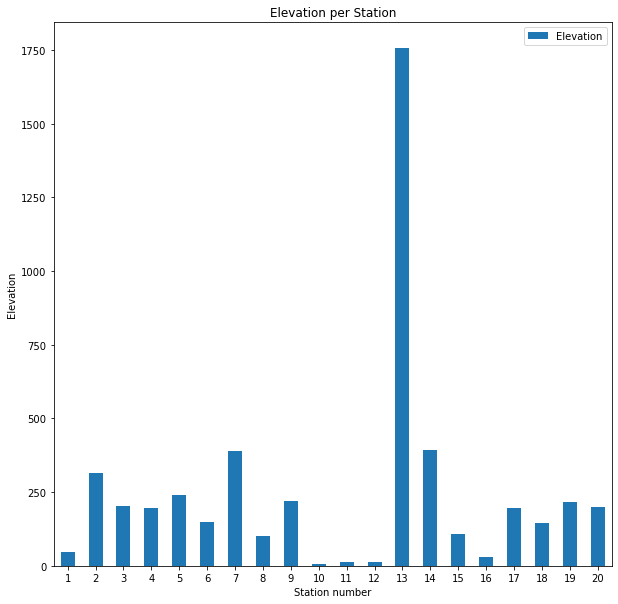

In [34]:

def calcElevation(x):
    P=x['stnpressure']
    p0=x['sealevel']
    return 44330 * (1-(P/p0)**(1/5.255))
weather['Elevation']=weather.apply(lambda x: calcElevation(x), axis=1)
elev=weather.groupby("station_nbr", sort=True)['Elevation'].mean().reset_index()
plt.figure(figsize=(12,12))
elev.plot.bar(x='station_nbr', y='Elevation', rot=0,figsize=(10,10))
plt.ylabel('Elevation')
plt.xlabel('Station number')
plt.title('Elevation per Station')

